In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
rbs = pd.read_csv('../Capstone_csv_file/rbs_100+_salary_17-18')

In [3]:
rbs.dtypes

NAME              object
100+ YDS           int64
100+ YDS_rank    float64
salary             int64
dtype: object

In [4]:
rbs.head()

,NAME,100+ YDS,100+ YDS_rank,salary
0,Todd Gurley,6,1.5,3455796
1,Ezekiel Elliott,5,4.0,6239085
2,Leonard Fournette,5,4.0,6787711
3,Le'Veon Bell,4,7.0,12120000
4,Mark Ingram,4,7.0,4000000


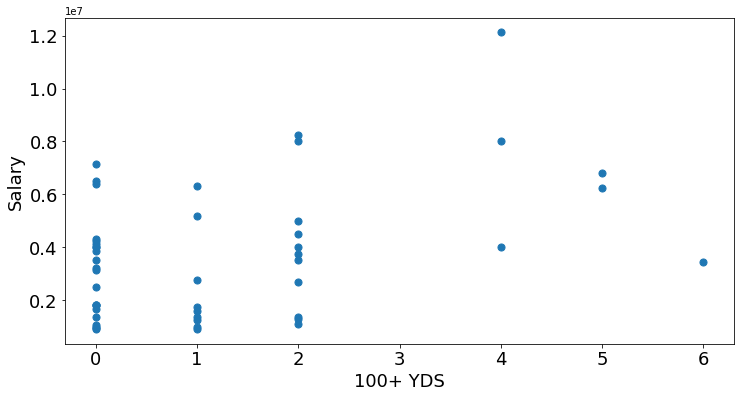

In [5]:
ax = rbs.plot(kind="scatter", x = '100+ YDS',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('100+ YDS', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(rbs.loc[:, ['100+ YDS', 'salary']])

In [7]:
X.mean(axis = 0)

array([-6.47630098e-17, -6.93889390e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-0.68799666,  0.53222219],
       [ 2.44171362,  0.59606811],
       [ 0.4343822 , -0.2678247 ],
       [ 1.14666109,  2.20766245],
       [-0.58007561, -0.82907453]])

In [11]:
km.predict(X)

array([1, 1, 1, 3, 1, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 4, 4, 0, 4, 4,
       4, 2, 4, 0, 4, 4, 4, 4, 0, 4, 0, 0, 0, 0, 4, 0, 0, 4, 4, 4, 4, 0,
       0, 0, 4, 4], dtype=int32)

In [12]:
rbs['clusters'] = km.labels_
rbs.head()

,NAME,100+ YDS,100+ YDS_rank,salary,clusters
0,Todd Gurley,6,1.5,3455796,1
1,Ezekiel Elliott,5,4.0,6239085,1
2,Leonard Fournette,5,4.0,6787711,1
3,Le'Veon Bell,4,7.0,12120000,3
4,Mark Ingram,4,7.0,4000000,1


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[1.66666667e-01, 4.96329667e+06],
       [5.00000000e+00, 5.12064800e+06],
       [1.90000000e+00, 2.99154250e+06],
       [3.00000000e+00, 9.09250000e+06],
       [3.33333333e-01, 1.60831522e+06]])

In [14]:
rbs.groupby('clusters')[['100+ YDS', 'salary']].mean()

,100+ YDS,salary
clusters,,
0,0.166667,4.963297e+06
1,5.000000,5.120648e+06
2,1.900000,2.991542e+06
3,3.000000,9.092500e+06
4,0.333333,1.608315e+06


In [15]:
centroids = rbs.groupby('clusters')[['100+ YDS', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

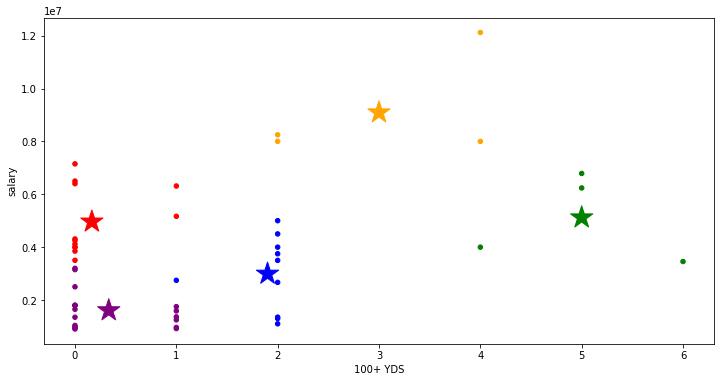

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
rbs['color'] = rbs['clusters'].map(lambda p: colors[p])

ax = rbs.plot(    
    kind = 'scatter', 
    x = '100+ YDS', y = 'salary',
    figsize = (12,6),
    c = rbs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = '100+ YDS', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

15.863809682883279

In [18]:
silhouette_score(X, km.labels_)

0.43850262369061505